In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from operator import add

%matplotlib inline

Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Attributes:
    
Demographic:

    Sex: male or female(Nominal)
    Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Education: no further information provided
    
Behavioral:
    Current Smoker: whether or not the patient is a current smoker (Nominal)
    Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
    Information on medical history:
    BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    Diabetes: whether or not the patient had diabetes (Nominal)
        
Information on current medical condition:
    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    Glucose: glucose level (Continuous)
        
Target variable to predict:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [48]:
#load the data
data=pd.read_csv(r"C:\Users\syed9\Downloads\risk.csv")


In [49]:
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [52]:
data.shape

(4240, 15)

Exploratory Data Analysis
3.1 Missing variables
Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [53]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [54]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


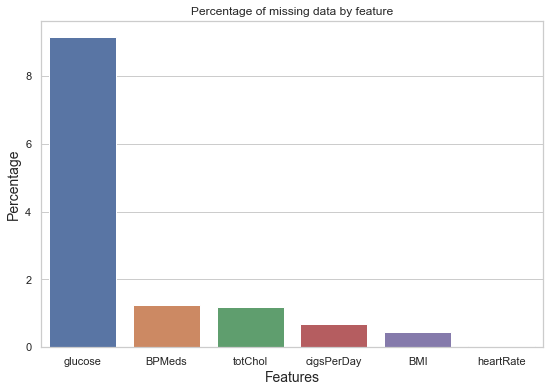

In [55]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

The blood glucose entry has the highest percentage of missing data i.e at 9.15% the rest have very few missing entries.

Since missing entries account for only 12% of the total data we can drop these entries

In [56]:
data.dropna(axis=0, inplace=True)

In [57]:
data.shape

(3751, 15)

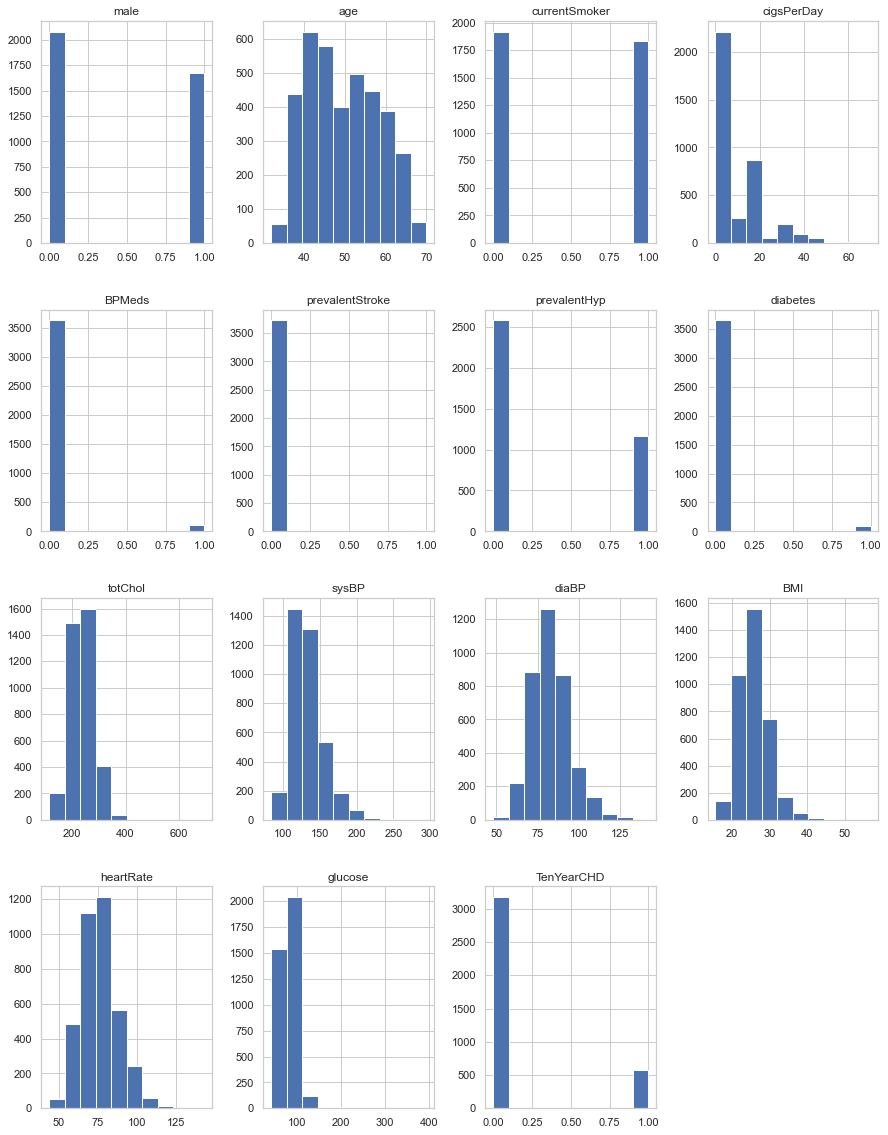

In [58]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

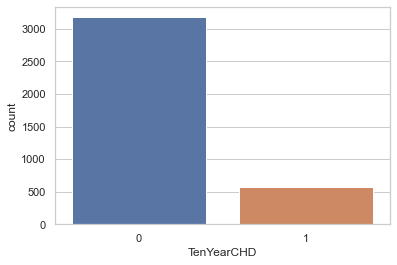

There are 3179 patients without heart disease and 572 patients with the disease


In [59]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

Number of people who have disease vs age

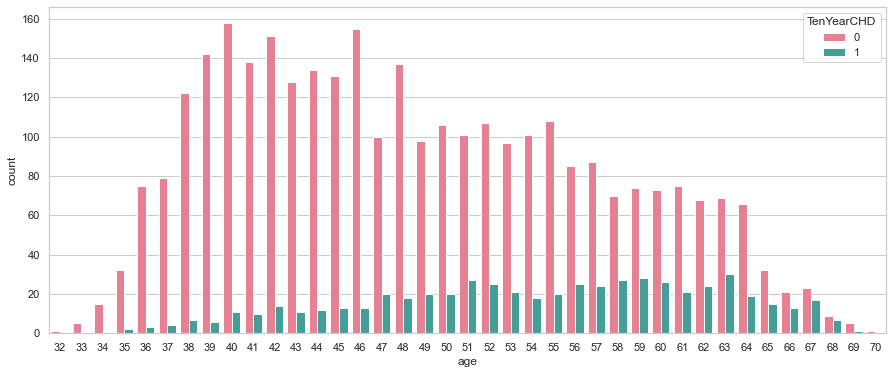

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63 i.e. the blue bars

Data analysis

In [61]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

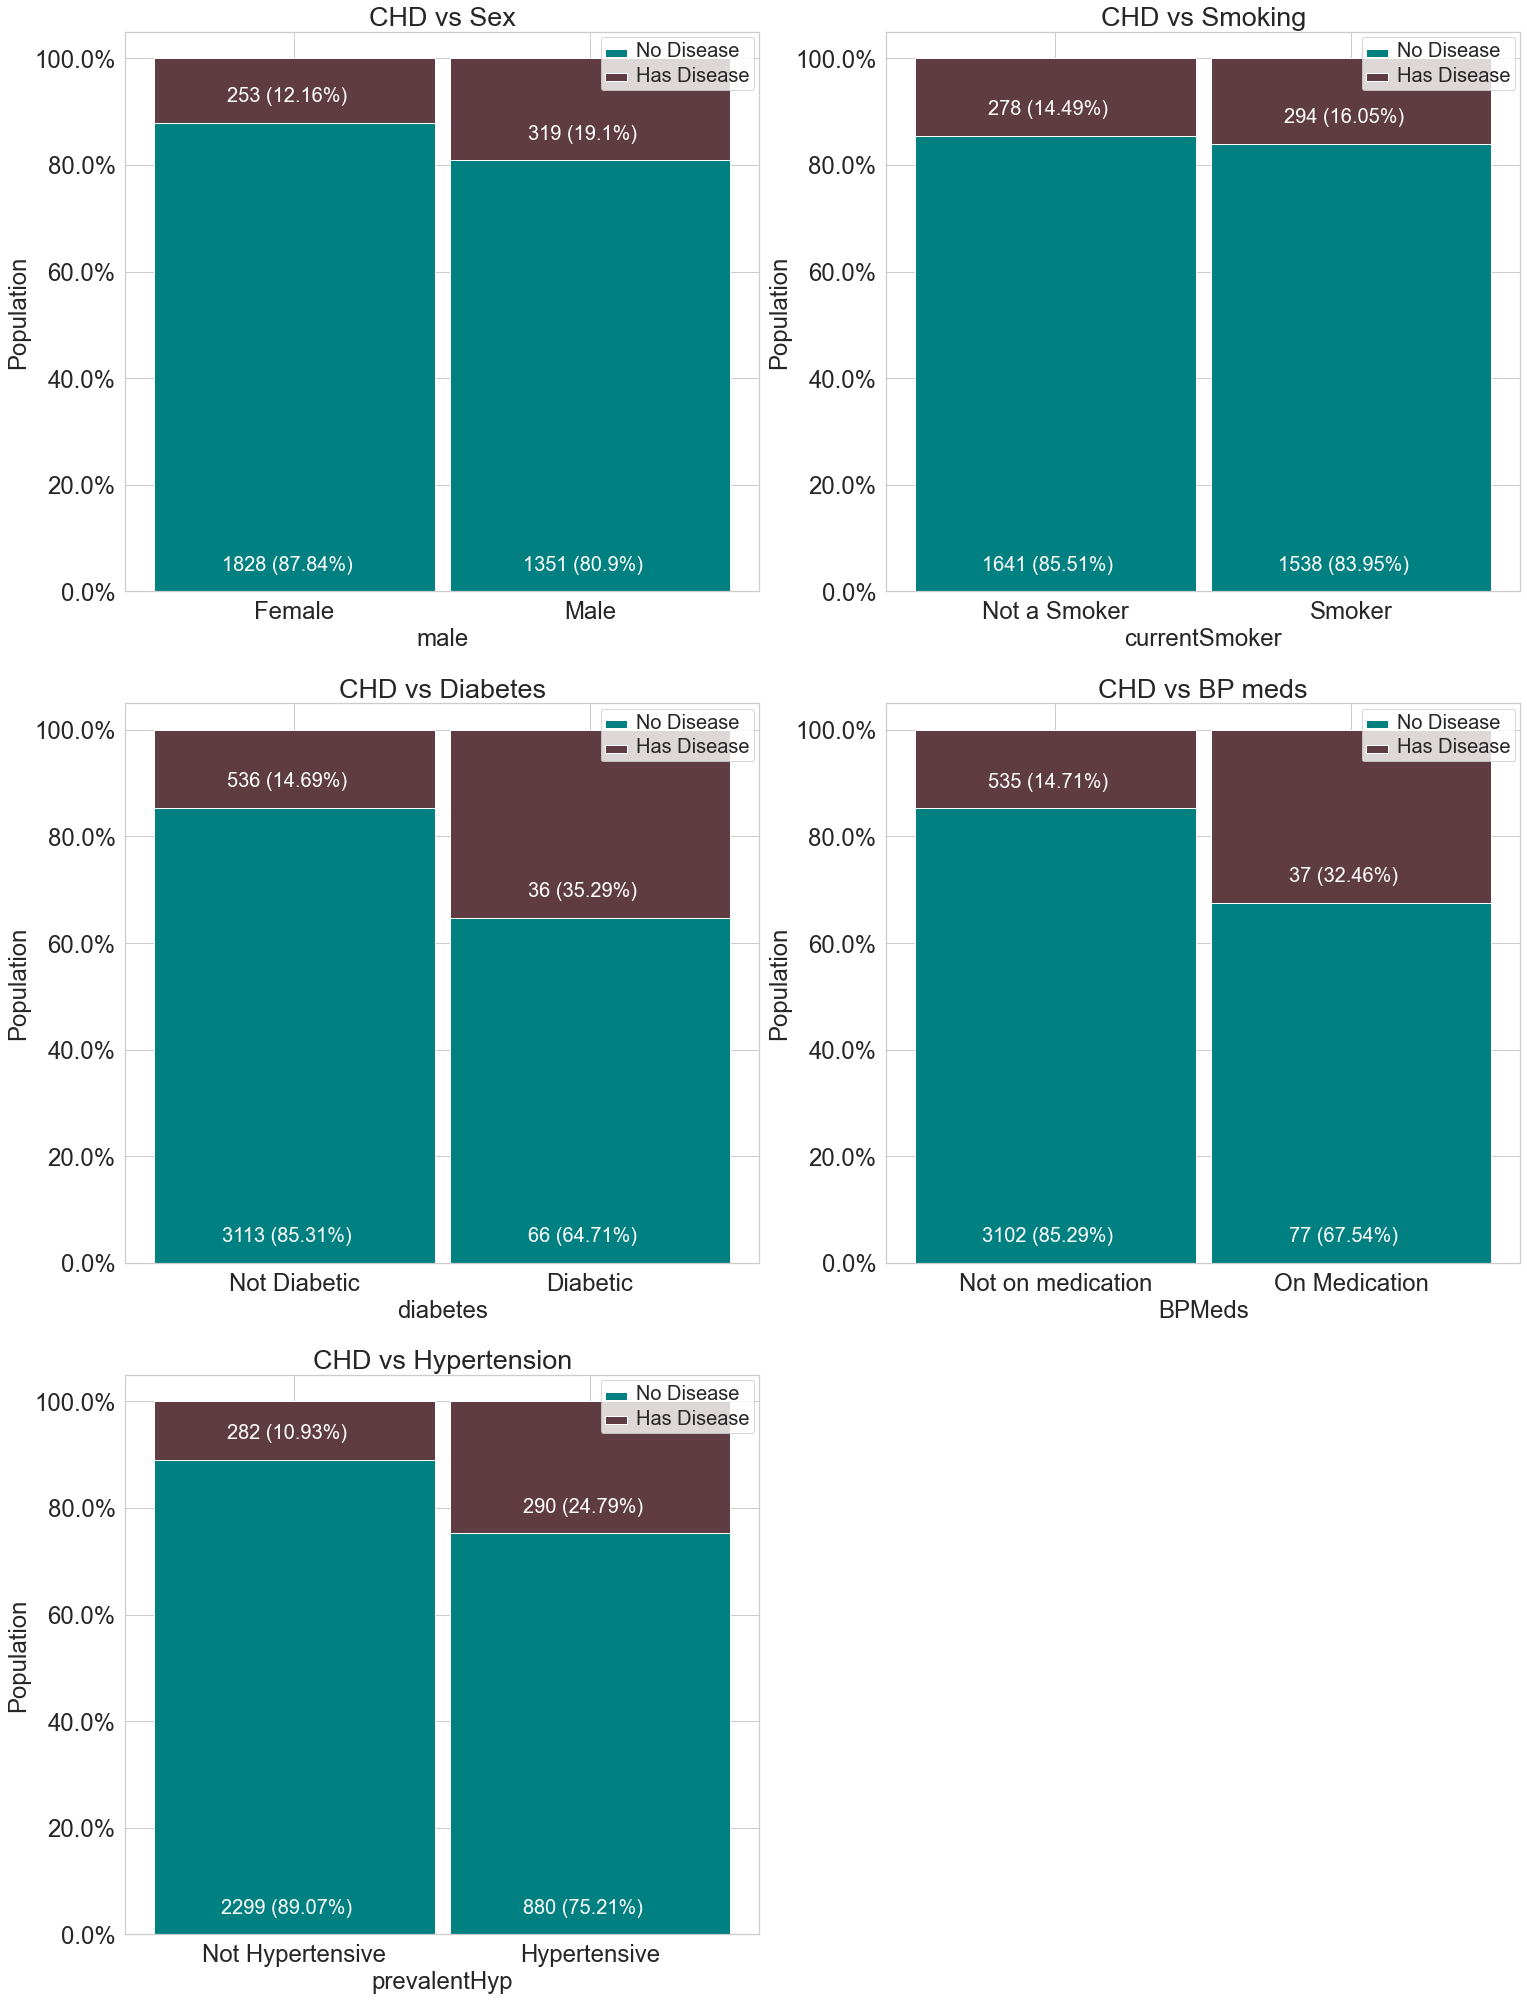

In [62]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

Due to the imbalanced nature of the dataset it is difficult to make conclusions but based on what is observed

Slightly more males are suffering from CHD than females
The odds of developing CHD are higher in the hypertensive and diabetic patients and are almost similar between smokers and non smokers

Number of people who have disease vs age

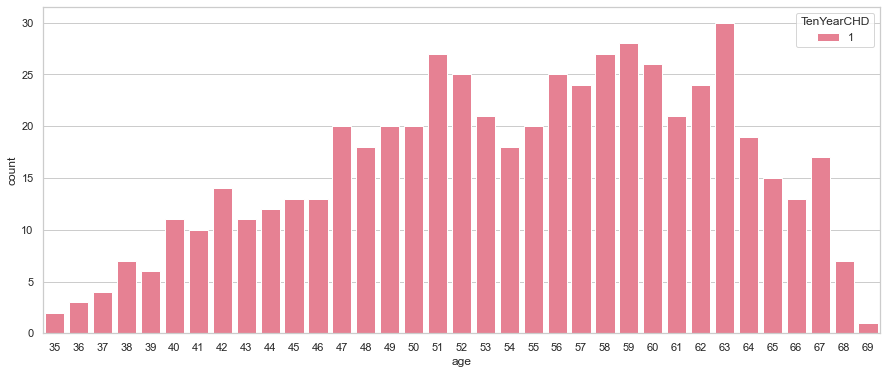

In [63]:
positive_cases = data[data['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

Correlation Heat map

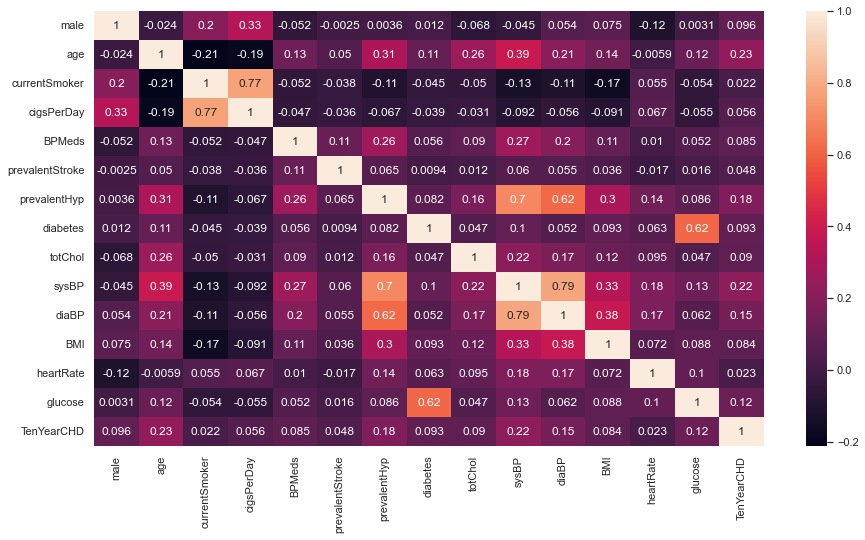

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

Feature Selection

In [65]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [68]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x15903E10840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x15903E10840, verbose=2)

In [69]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

We see that age and the systolic blood pressures are selected as the most important features for predicting the Ten year risk of developing CHD.

However we will use thee six most important features to build our models

In [70]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are: 1. Age 2. Total cholesterol 3. Systolic blood pressure 4. Diastolic blood pressure 5. BMI 6. Heart rate 7. Blood glucose

Statistics on the top features

In [71]:
import statsmodels.api as sm

In [72]:
X_top = data[top_features]
y = data['TenYearCHD']

In [73]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                 0.02354
Time:                        09:51:42   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [74]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


Holding all other features constant, the odds of getting diagnosed with heart disease increases with about 2% for every increase in age an systolic blood pressure

The other factors show no significant change


Pair plots

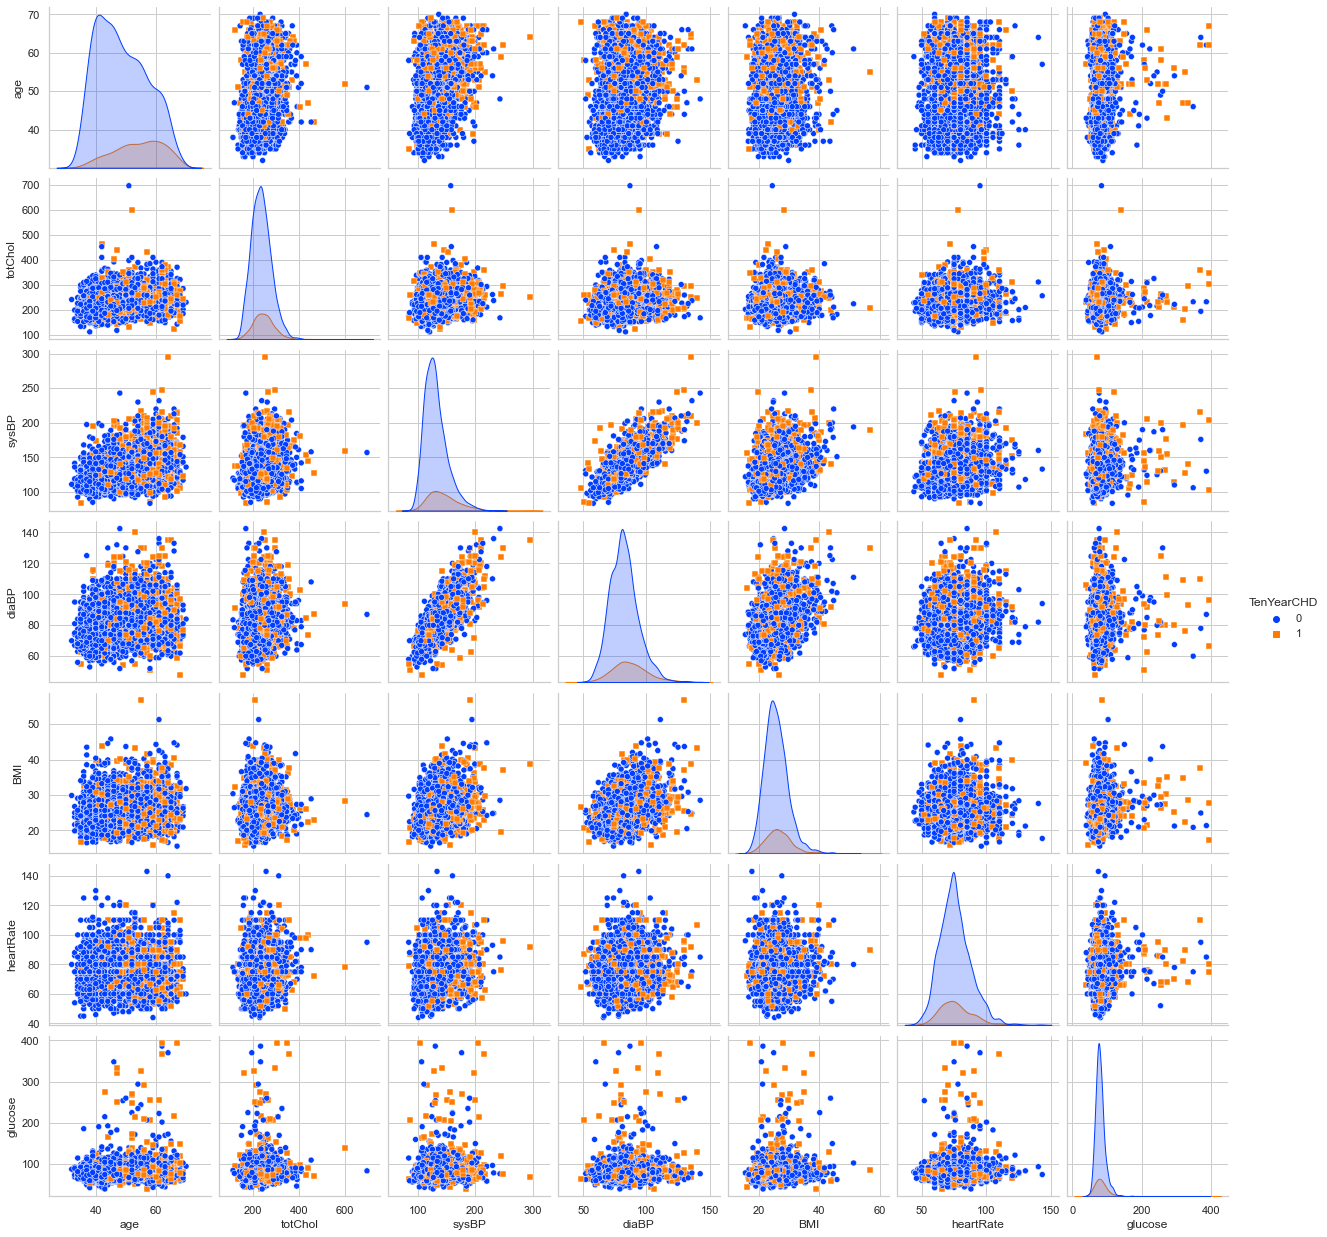

In [75]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))

There are no characteristics that split the data well

 Models and predictions

In [76]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [78]:
X = data[top_features]
y = data.iloc[:,-1]

In [79]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [80]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


In [81]:
pip install barplots

Note: you may need to restart the kernel to use updated packages.


Splitting data to Training and Testing set

In [82]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,52,248.0,119.0,82.0,26.55,65.0,100.0,0
1,43,245.0,144.5,95.0,27.15,70.0,45.0,0
2,45,347.0,157.0,98.0,26.63,88.0,80.0,0
3,64,320.0,130.0,77.0,26.24,70.0,74.0,0
4,47,241.0,122.5,77.0,22.18,90.0,78.0,0


In [83]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,52,248.0,119.0,82.0,26.55,65.0,100.0
1,43,245.0,144.5,95.0,27.15,70.0,45.0
2,45,347.0,157.0,98.0,26.63,88.0,80.0
3,64,320.0,130.0,77.0,26.24,70.0,74.0
4,47,241.0,122.5,77.0,22.18,90.0,78.0


In [84]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

 Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

Models

The four algorithms that will be used are:

Logistic Regression
k-Nearest Neighbours
Decision Trees
Support Vector Machine

 Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [88]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [89]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [90]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [91]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.03%


<Axes: >

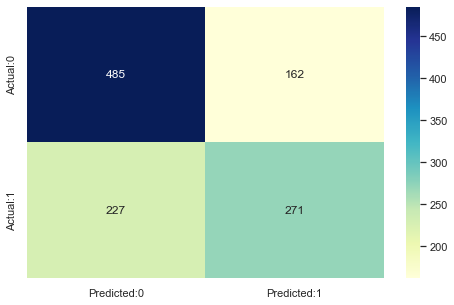

In [92]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [93]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       647
           1       0.63      0.54      0.58       498

    accuracy                           0.66      1145
   macro avg       0.65      0.65      0.65      1145
weighted avg       0.66      0.66      0.66      1145



In [94]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 58.22%


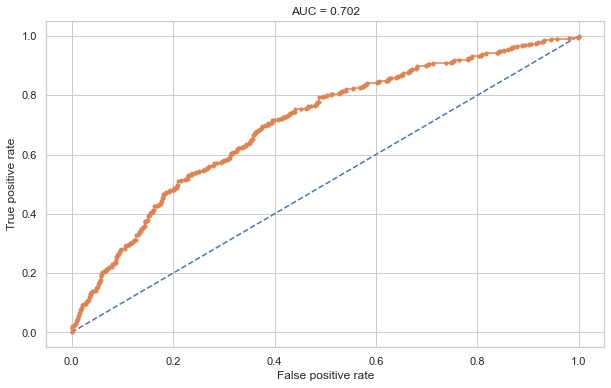

In [95]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

 k-Nearest Neighbours

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [98]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 2}

In [99]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [100]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 85.33%


<Axes: >

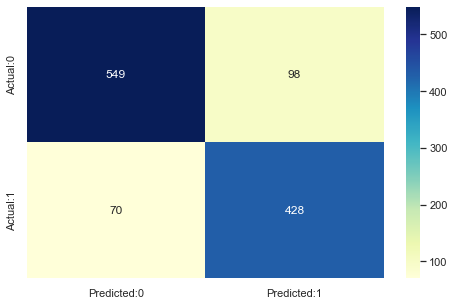

In [101]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [102]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       647
           1       0.81      0.86      0.84       498

    accuracy                           0.85      1145
   macro avg       0.85      0.85      0.85      1145
weighted avg       0.86      0.85      0.85      1145



In [103]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 83.59%


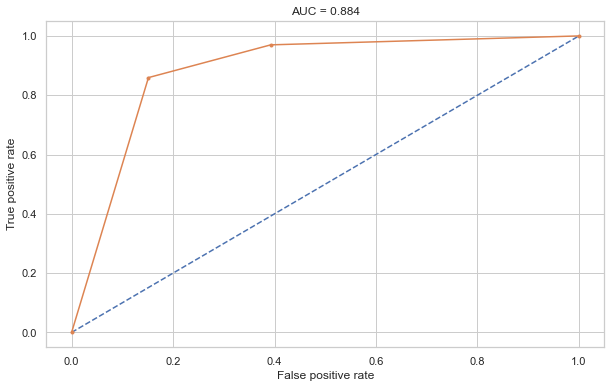

In [104]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

Decision Trees

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [106]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [107]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [108]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [109]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 75.37%


<Axes: >

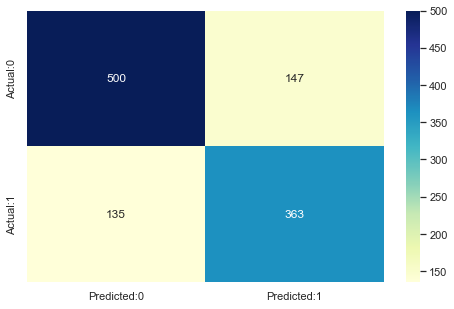

In [110]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [111]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       647
           1       0.71      0.73      0.72       498

    accuracy                           0.75      1145
   macro avg       0.75      0.75      0.75      1145
weighted avg       0.75      0.75      0.75      1145



In [112]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 72.02%


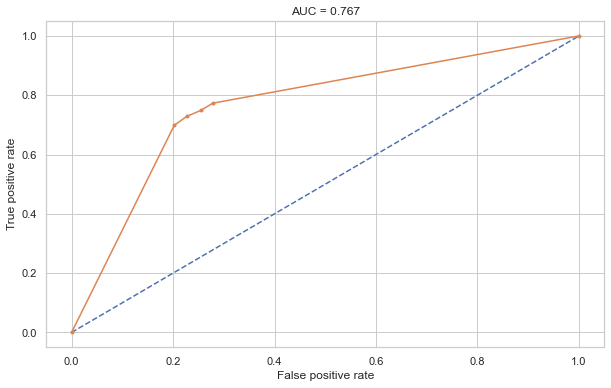

In [113]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

 Support Vector Machine

In [114]:
from sklearn.svm import SVC

In [115]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [116]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [126]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [127]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 85.94%


<Axes: >

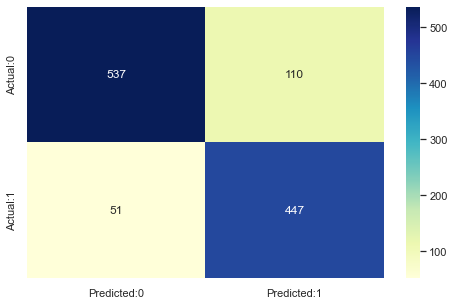

In [128]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [129]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       647
           1       0.80      0.90      0.85       498

    accuracy                           0.86      1145
   macro avg       0.86      0.86      0.86      1145
weighted avg       0.87      0.86      0.86      1145



In [130]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 84.74%


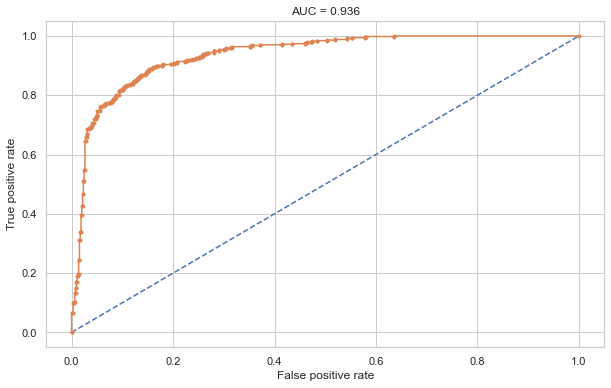

In [131]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

Model Comparison

In [132]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [133]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.660262,0.701924,0.582170
K-nearest neighbours,0.853275,0.883896,0.835937
Decision trees,0.753712,0.766502,0.720238
Support vector machine,0.859389,0.935786,0.847393


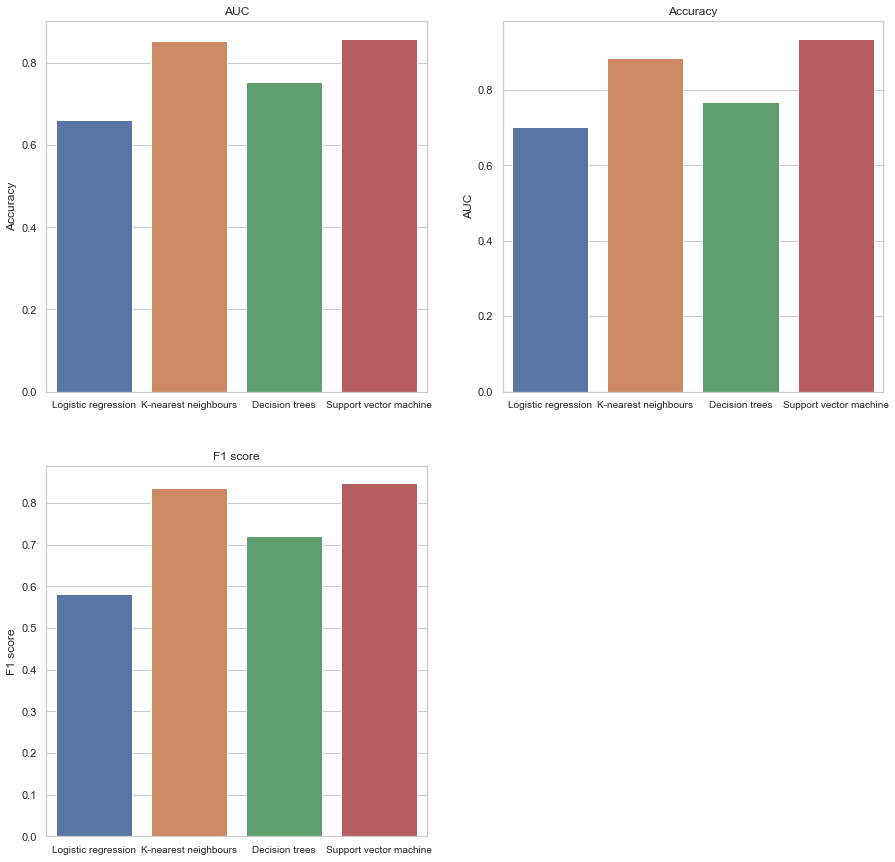

In [134]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

In [136]:
my_data =my_data[top_features]
my_data

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,195.0,106.0,70.0,26.97,80.0,77.0
1,46,250.0,121.0,81.0,28.73,95.0,76.0
2,48,245.0,127.5,80.0,25.34,75.0,70.0
3,61,225.0,150.0,95.0,28.58,65.0,103.0
4,46,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...
4233,50,313.0,179.0,92.0,25.97,66.0,86.0
4234,51,207.0,126.5,80.0,19.71,65.0,68.0
4237,52,269.0,133.5,83.0,21.47,80.0,107.0
4238,40,185.0,141.0,98.0,25.60,67.0,72.0


In [179]:
prediction = svm_clf.predict(my_data)

In [180]:
print('you are not a risk') if prediction[0]==0 else print('you are at risk')

you are not a risk


In [181]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
detalis=[[52,269.0,133.5,83.0,21.47,80.0,107.0]]

In [186]:
prediction1= svm_clf.predict(detalis)

In [187]:
if prediction1==0:
    print('you are not a risk')
    
else:
    print('you are at risk')

you are not a risk
